In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import xesmf as xe
import cartopy.crs as ccrs

In [19]:
#conda list

In [4]:
path='/scratch/jgaigala/'
file='asr15km.anl.2D.200001.mon.nc'
var='SNOALB'
#var='T2M'

In [5]:
#conda list

In [6]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:   (Time: 1, lev: 4, x: 720, y: 720)
Coordinates:
  * Time      (Time) datetime64[ns] 2000-01-16T11:00:00
    XLAT      (y, x) float32 ...
    XLONG     (y, x) float32 ...
  * lev       (lev) float64 1.0 2.0 3.0 4.0
Dimensions without coordinates: x, y
Data variables: (12/30)
    DateTime  (Time) int32 ...
    ALBBCK    (Time, y, x) float32 ...
    ALBEDO    (Time, y, x) float32 ...
    ALBSI     (Time, y, x) float32 ...
    ICEDEPTH  (Time, y, x) float32 ...
    ISLTYP    (Time, y, x) int32 ...
    ...        ...
    TSLB      (Time, lev, y, x) float32 ...
    U10E      (Time, y, x) float32 ...
    U10M      (Time, y, x) float32 ...
    V10E      (Time, y, x) float32 ...
    V10M      (Time, y, x) float32 ...
    VEGFRA    (Time, y, x) float32 ...
Attributes: (12/53)
    CDI:                             Climate Data Interface version 1.5.4 (ht...
    Conventions:                     CF-1.4
    TITLE:                           Arctic System Reanalysis - The Ohio Stat...
    WEST-EAST_GRID_DIMENSION:        721
    SOUTH-NORTH_GRID_DIMENSION:      721
    BOTTOM-TOP_GRID_DIMENSION:       34
    ...                              ...
    IFNDALBSI:                       1
    IFNDICEDEPTH:                    1
    IFNDSNOWSI:                      1
    CDO:                             Climate Data Operators version 1.5.4 (ht...
    history:                         Wed Mar 15 21:08:02 2017: ./ncks -C -O -...
    NCO:                             4.2.1

In [7]:
ds[var].values

array([[[0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        ...,
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ]]], dtype=float32)

Text(0, 0.5, 'lat')

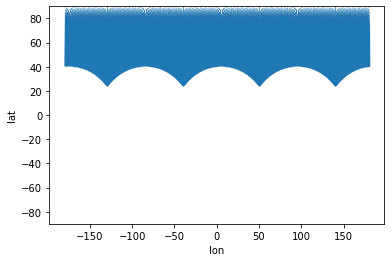

In [8]:
plt.scatter(ds['XLONG'], ds['XLAT'], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel('lon')
plt.ylabel('lat')

In [9]:
ds = ds.rename({'XLONG': 'lon', 'XLAT': 'lat'})

In [20]:
new_lat=np.arange(-90,90.5,0.5)
new_lon=np.arange(0,360.1,0.1)

ds_out = xr.Dataset({'lat': (['lat'], new_lat),
                    'lon': (['lon'], new_lon)
                    })
regridder = xe.Regridder(ds, ds_out,'bilinear')
dr_out = regridder(ds[var]).to_dataset(name=var)
dr_out

Overwrite existing file: bilinear_720x720_361x3601.nc 
 You can set reuse_weights=True to save computing time.


<xarray.Dataset>
Dimensions:  (Time: 1, lat: 361, lon: 3601)
Coordinates:
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * Time     (Time) datetime64[ns] 2000-01-16T11:00:00
Data variables:
    SNOALB   (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.7473 0.7473 0.7473

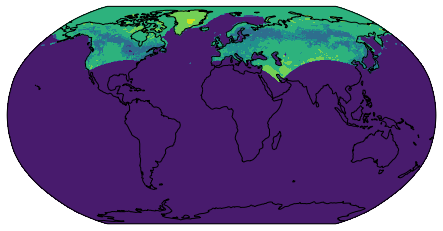

In [22]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.Robinson())
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],transform=ccrs.PlateCarree())
ax.coastlines()

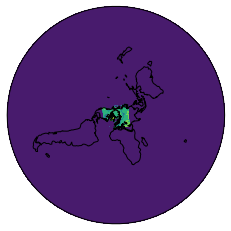

In [23]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()

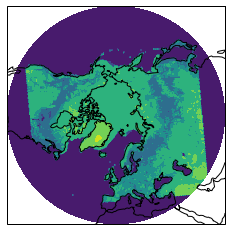

In [24]:
# Select arctic region
dr_arctic=dr_out.sel(lat=slice(30,90))
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_arctic['lon'],dr_arctic['lat'],dr_arctic[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()